In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r'train_processed.csv')
df.head(5)

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontageNaN,MasVnrAreaNaN,GarageYrBltNaN
0,1,12.247694,0.235294,0.75,0.418208,0.366344,1.0,1.0,0.000000,0.333333,...,1.0,1.0,0.0,0.090909,0.50,0.666667,0.75,0.0,0.0,0.0
1,2,12.109011,0.000000,0.75,0.495064,0.391317,1.0,1.0,0.000000,0.333333,...,1.0,1.0,0.0,0.363636,0.25,0.666667,0.75,0.0,0.0,0.0
2,3,12.317167,0.235294,0.75,0.434909,0.422359,1.0,1.0,0.333333,0.333333,...,1.0,1.0,0.0,0.727273,0.50,0.666667,0.75,0.0,0.0,0.0
3,4,11.849398,0.294118,0.75,0.388581,0.390295,1.0,1.0,0.333333,0.333333,...,1.0,1.0,0.0,0.090909,0.00,0.666667,0.00,0.0,0.0,0.0
4,5,12.429216,0.235294,0.75,0.513123,0.468761,1.0,1.0,0.333333,0.333333,...,1.0,1.0,0.0,1.000000,0.50,0.666667,0.75,0.0,0.0,0.0


In [3]:
y = df['SalePrice']
x = df.drop(['Id','SalePrice'],axis=1)

In [4]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [6]:
x1 = xgb.XGBRegressor()

In [7]:
x1.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [8]:
y_pred = x1.predict(x_test)

Test RMSE

In [9]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,y_pred))

0.14552675121147188

In [10]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.886513927195601


In [11]:
y_pred_train = x1.predict(x_train)

Train RMSE

In [12]:
np.sqrt(mean_squared_error(y_train,y_pred_train))

0.007157521485119162

C:\Users\TEKANA\Anaconda3\envs\TAP_project\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


0.886513927195601

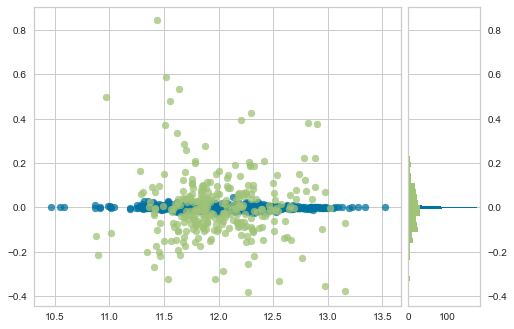

In [13]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(x1)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)


XGboost with hyperparameter tuning

In [14]:
#XGboost with hyperparameter tuning
y = df['SalePrice']
x = df.drop(['Id','SalePrice'],axis=1)

In [15]:
regressor = xgb.XGBRegressor()

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
params = {'n_estimators':[100,500,900,1100,1500],
          'max_depth':[2,3,5,10,15],
          'booster':['gbtree','gblinear'],
          'learning_rate':[0.05,0.1,0.15,0.20],
          'min_child_weight':[1,2,3,4],
          'gamma':[0.1,0.2,0.3,0.4,0.5]
          
          }

In [18]:
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=regressor,param_distributions=params,
                               cv=10,n_iter=50,
                               scoring='neg_mean_absolute_error',n_jobs=4,
                               verbose=5,
                               return_train_score=True,
                               random_state=42)

In [19]:
#random_cv.fit(x_train,y_train)

In [20]:
#random_cv.best_estimator_

In [21]:
regressor = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.2,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=4, missing=None, n_estimators=1500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [22]:
regressor.fit(x_train,y_train)

[16:25:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[16:25:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.2, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=10,
             min_child_weight=4, missing=None, monotone_constraints='()',
             n_estimators=1500, n_jobs=1, nthread=1, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=0, silent=None, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=1)

In [23]:
ypred = regressor.predict(x_test)

Test RMSE

In [24]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,ypred))

0.14165493991910133

In [25]:
from sklearn.metrics import r2_score
print(r2_score(y_test, ypred))

0.892472302157507


In [26]:
y_pred_train = regressor.predict(x_train)

Train RMSE

In [27]:
np.sqrt(mean_squared_error(y_train,y_pred_train))

0.10059751511067853

In [28]:
print(r2_score(y_train,y_pred_train))

0.9336160539649072


0.892472302157507

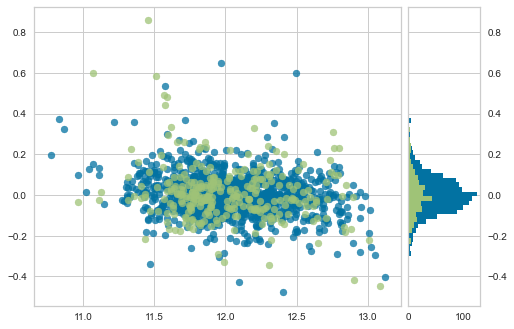

In [29]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(regressor)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)

In [30]:
ypred_norm = np.expm1(regressor.predict(x_test))

In [31]:
ytest_norm = np.expm1(y_test)

In [32]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(ytest_norm,ypred_norm))

30718.769053865613

In [33]:
(ypred_norm - ytest_norm).abs().describe()

count       292.000000
mean      17337.275056
std       25402.194781
min          26.046875
25%        4704.753906
50%       10822.671875
75%       20389.335938
max      272409.562500
Name: SalePrice, dtype: float64

In [34]:
importances = regressor.feature_importances_

In [35]:
indices = np.argsort(importances)[::-1]

In [36]:
names = [x_train.columns[i] for i in indices]

([<matplotlib.axis.XTick at 0x284b4b99cf8>,
 [Text(0, 0, 'GarageFinish'),
  Text(1, 0, 'GarageCars'),
  Text(2, 0, 'FireplaceQu'),
  Text(3, 0, 'Neighborhood'),
  Text(4, 0, 'KitchenQual'),
  Text(5, 0, 'TotalBsmtSF'),
  Text(6, 0, 'OverallQual'),
  Text(7, 0, 'GarageType'),
  Text(8, 0, 'GarageArea'),
  Text(9, 0, 'GarageCond')])

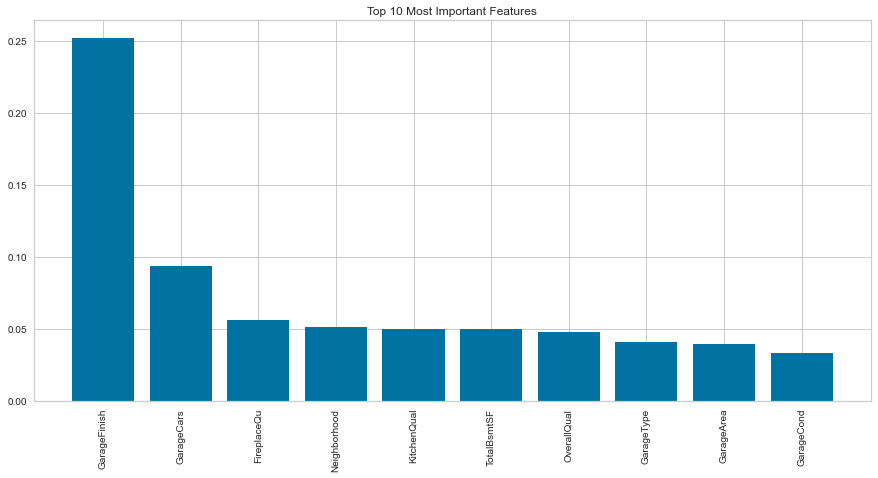

In [37]:
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Top 10 Most Important Features") # Create plot title
plt.bar(range(10), importances[indices][:10]) # Add bars
plt.xticks(range(10), names[:10], rotation=90)

XGBoost with top 10 features

In [38]:
#Xgboost with important most important features
y = df['SalePrice']
x = df[['GarageCars','KitchenQual','FireplaceQu','GarageCond','GarageType','GarageFinish','OverallQual','GrLivArea','Neighborhood','TotalBsmtSF']]

In [39]:
xg_reg = xgb.XGBRegressor()

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [41]:
params = {'n_estimators':[100,500,900,1100,1500],
          'max_depth':[2,3,5,10,15],
          'booster':['gbtree','gblinear'],
          'learning_rate':[0.05,0.1,0.15,0.20],
          'min_child_weight':[1,2,3,4],
          
          }

In [42]:
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=xg_reg,param_distributions=params,
                               cv=5,n_iter=50,
                               scoring='neg_mean_absolute_error',n_jobs=4,
                               verbose=5,
                               return_train_score=True,
                               random_state=42)

In [43]:
#random_cv.fit(x_train,y_train)

In [44]:
#random_cv.best_estimator_

In [45]:
xg_reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.15, max_delta_step=0,
             max_depth=2, min_child_weight=4, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [46]:
xg_reg.fit(x_train,y_train)

[16:25:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[16:25:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.15, max_delta_step=0, max_depth=2,
             min_child_weight=4, missing=None, monotone_constraints='()',
             n_estimators=100, n_jobs=1, nthread=1, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=0, silent=None, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=1)

In [47]:
y_pred = xg_reg.predict(x_test)

Test RMSE

In [48]:
#test rmse
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,y_pred))

0.14978430086383865

In [49]:
y_pred_train = xg_reg.predict(x_train)

Train RMSE

In [50]:
#train rmse
np.sqrt(mean_squared_error(y_train,y_pred_train))

0.12731749318261967

In [51]:
ypred_norm = np.expm1(xg_reg.predict(x_test))
ytest_norm = np.expm1(y_test)

In [71]:
ypred_norm[0]

139325.56

In [65]:
ytest_norm.iloc[0]-ypred_norm[0]

15173.437499999884

In [52]:
#test rmse
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(ytest_norm,ypred_norm))

29272.42797452829

In [53]:
ytrain_norm = np.expm1(y_train)
ypred_train_norm = np.expm1(xg_reg.predict(x_train))

In [54]:
#train rmse
np.sqrt(mean_squared_error(ytrain_norm,ypred_train_norm))

24298.58666486339

In [55]:
#ytest_norm.describe()

In [67]:
(ypred_norm - ytest_norm).abs()

892     15173.437500
1105     9743.843750
413      7028.789063
522      8376.187500
1036     7002.750000
            ...     
479     23073.445312
1361    26343.453125
802      1755.937500
651     17541.750000
722     12694.343750
Name: SalePrice, Length: 292, dtype: float64

In [57]:
pd.Series(ypred_norm).describe()

count       292.000000
mean     177373.453125
std       78315.164062
min       54848.101562
25%      124736.625000
50%      152988.906250
75%      207674.156250
max      563373.125000
dtype: float64

0.8797764653069444

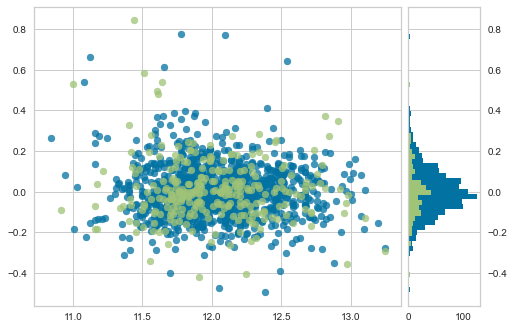

In [58]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(xg_reg)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
#there is good scatter of data which tells the model is good fit

(0.0, 400000.0)

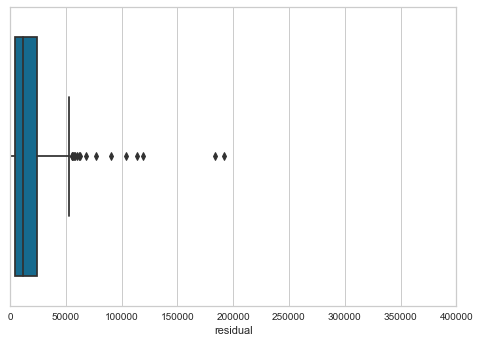

In [59]:
sns.boxplot(x=(ypred_norm - ytest_norm).abs(),data=df)
plt.xlabel("residual")
plt.xlim(0,400000)
#damn close to zero so it's a good result